In [147]:
from __future__ import print_function, division
import unittest
from os.path import join
from os import remove
from nilmtk.datastore import HDFDataStore
from nilmtk import DataSet
from nilmtk.disaggregate import FHMM

import pandas as pd
from pandas import HDFStore

In [148]:
from latent_Bayesian_melding import LatentBayesianMelding

In [149]:
filename_meterdata_ukdale = join("/Users/nipunbatra/Downloads/", 'meterdata_ukdale.h5')

In [150]:
%matplotlib inline

In [151]:
meterdata_ukdale = HDFStore(filename_meterdata_ukdale)

In [152]:
meterdata_ukdale['/meterdata'].head()

,"('laptop computer', 1)","('computer monitor', 1)","('active speaker', 1)","('computer', 1)","('broadband router', 1)","('external hard disk', 1)","('kettle', 1)","('rice cooker', 1)","('running machine', 1)","('laptop computer', 2)","('washing machine', 1)","('dish washer', 1)","('fridge', 1)","('microwave', 1)","('toaster', 1)","('games console', 1)","('modem', 1)","('cooker', 1)",mains,synthetic mains
2013-06-08 00:00:00+01:00,0,0,1,4.701754,2.052632,0.300000,0.280702,0.333333,3.166667,0.000000,1.066667,0.283333,29.250000,0,0.016667,0.300000,3,0,58.117223,45.751754
2013-06-08 00:02:00+01:00,0,0,1,4.733333,2.033333,0.200000,0.333333,0.333333,3.157895,0.070175,1.052632,0.333333,32.000000,0,0.105263,0.315789,3,0,65.959752,48.668421
2013-06-08 00:04:00+01:00,0,0,1,4.649123,2.087719,0.228070,0.298246,0.333333,3.166667,0.033333,1.133333,0.298246,30.508771,0,0.100000,0.300000,3,0,64.443502,47.136842
2013-06-08 00:06:00+01:00,0,0,1,4.300000,2.133333,0.316667,0.333333,0.333333,3.416667,0.033333,1.050000,0.300000,29.633334,0,0.066667,0.245614,3,0,63.058278,46.162281
2013-06-08 00:08:00+01:00,0,0,1,4.298246,2.035088,0.192982,0.333333,0.333333,3.192982,0.052632,1.087719,0.315789,29.052633,0,0.105263,0.300000,3,0,62.140030,45.300001


In [153]:
sample_seconds = 120

In [154]:
building_information = 'ukdale/building2/2013-06-08'

In [155]:
meterdata = meterdata_ukdale['meterdata']

In [156]:
meterdata.head()

,"('laptop computer', 1)","('computer monitor', 1)","('active speaker', 1)","('computer', 1)","('broadband router', 1)","('external hard disk', 1)","('kettle', 1)","('rice cooker', 1)","('running machine', 1)","('laptop computer', 2)","('washing machine', 1)","('dish washer', 1)","('fridge', 1)","('microwave', 1)","('toaster', 1)","('games console', 1)","('modem', 1)","('cooker', 1)",mains,synthetic mains
2013-06-08 00:00:00+01:00,0,0,1,4.701754,2.052632,0.300000,0.280702,0.333333,3.166667,0.000000,1.066667,0.283333,29.250000,0,0.016667,0.300000,3,0,58.117223,45.751754
2013-06-08 00:02:00+01:00,0,0,1,4.733333,2.033333,0.200000,0.333333,0.333333,3.157895,0.070175,1.052632,0.333333,32.000000,0,0.105263,0.315789,3,0,65.959752,48.668421
2013-06-08 00:04:00+01:00,0,0,1,4.649123,2.087719,0.228070,0.298246,0.333333,3.166667,0.033333,1.133333,0.298246,30.508771,0,0.100000,0.300000,3,0,64.443502,47.136842
2013-06-08 00:06:00+01:00,0,0,1,4.300000,2.133333,0.316667,0.333333,0.333333,3.416667,0.033333,1.050000,0.300000,29.633334,0,0.066667,0.245614,3,0,63.058278,46.162281
2013-06-08 00:08:00+01:00,0,0,1,4.298246,2.035088,0.192982,0.333333,0.333333,3.192982,0.052632,1.087719,0.315789,29.052633,0,0.105263,0.300000,3,0,62.140030,45.300001


In [157]:
appliance_map = {'cooker':"('cooker', 1)",
                         'kettle':"('kettle', 1)",
                         'dishwasher':"('dish washer', 1)",
                         'toaster':"('toaster', 1)",
                         'washingmachine':"('washing machine', 1)",
                         'fridgefreezer':"('fridge', 1)", 
                         'microwave':"('microwave', 1)"}

In [158]:
meterlist = ['cooker', 'kettle', 'dishwasher','toaster',
                     'washingmachine','fridgefreezer', 'microwave']

In [159]:
appliancedata = meterdata
groundTruthApplianceReading = pd.DataFrame(index=meterdata.index)

In [160]:
groundTruthApplianceReading.head()

""
2013-06-08 00:00:00+01:00
2013-06-08 00:02:00+01:00
2013-06-08 00:04:00+01:00
2013-06-08 00:06:00+01:00
2013-06-08 00:08:00+01:00


In [161]:
for meter in appliance_map:
    groundTruthApplianceReading[meter] = meterdata[appliance_map[meter]]
    appliancedata = appliancedata.drop(appliance_map[meter],axis=1)    
## the sum of other meter readings which will not be disaggregated
groundTruthApplianceReading['othermeters'] = appliancedata.sum(axis=1)

In [162]:
groundTruthApplianceReading.head()

,fridgefreezer,dishwasher,toaster,cooker,washingmachine,kettle,microwave,othermeters
2013-06-08 00:00:00+01:00,29.250000,0.283333,0.016667,0,1.066667,0.280702,0,118.723363
2013-06-08 00:02:00+01:00,32.000000,0.333333,0.105263,0,1.052632,0.333333,0,129.472033
2013-06-08 00:04:00+01:00,30.508771,0.298246,0.100000,0,1.133333,0.298246,0,126.378589
2013-06-08 00:06:00+01:00,29.633334,0.300000,0.066667,0,1.050000,0.333333,0,123.999507
2013-06-08 00:08:00+01:00,29.052633,0.315789,0.105263,0,1.087719,0.333333,0,121.845294


In [163]:
mains = meterdata['mains']

In [164]:
mains.head()

2013-06-08 00:00:00+01:00    58.117223
2013-06-08 00:02:00+01:00    65.959752
2013-06-08 00:04:00+01:00    64.443502
2013-06-08 00:06:00+01:00    63.058278
2013-06-08 00:08:00+01:00    62.140030
Freq: 120S, Name: mains, dtype: float64

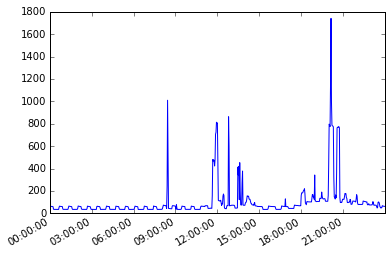

In [165]:
mains.plot()

In [166]:
lbm = LatentBayesianMelding()

In [167]:
individual_model = lbm.import_model(meterlist,join('.', 'appliance_model_induced_density.json'))

The trained meter: cooker
The trained meter: kettle
The trained meter: dishwasher
The trained meter: toaster
The trained meter: washingmachine
The trained meter: fridgefreezer
The trained meter: microwave


In [168]:
import time

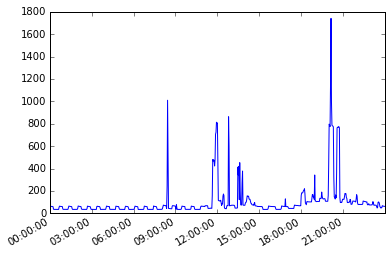

In [169]:
mains.plot()

In [170]:
a = time.time()
results = lbm.disaggregate_chunk(mains)
b = time.time()

*************Iteration: 1*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:62677
Number of constraints:41070
Primal solution status:SolutionStatus.Optimal
Primal value:279.011281317
Dual solution status:SolutionStatus.Optimal
Dual value:279.011217
Accepted solution status:AccSolutionStatus.Anything
+++++++++++++++optimization status+++++++++++++++++++
Solving this problem took '11.595266819' seconds

 log(datalikelihood*prior)=30701.1653628

*************Iteration: 2*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:62677
Number of constraints:41070
Primal solution status:SolutionStatus.Optimal
Primal value:279.484336861
Dual solution status:SolutionStatus.Optimal
Dual value

In [32]:
b-a

46.12233901023865

In [171]:
fr_pred = results['inferred appliance energy']['fridgefreezer']

In [172]:
fr_gt = groundTruthApplianceReading['fridgefreezer']

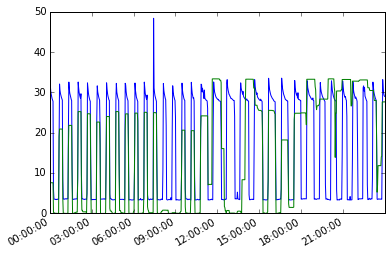

In [173]:
fr_gt.plot()
fr_pred.plot()

In [174]:
results['inferred appliance energy'][meterlist].sum()

cooker            11626.347254
kettle              979.395836
dishwasher        15896.989008
toaster               2.695045
washingmachine     8864.582814
fridgefreezer     11152.114510
microwave             1.863531
dtype: float64

In [177]:
len(mains)

720

In [96]:
individual_model.keys()

['cooker',
 'kettle',
 'dishwasher',
 'toaster',
 'washingmachine',
 'fridgefreezer',
 'microwave']

In [139]:
individual_model['fridgefreezer'].keys()

[u'numberOfCyclesStats',
 u'induced density of sac',
 u'means',
 u'sac',
 u'startprob',
 u'transprob',
 u'appliance code map',
 'numberOfStates',
 u'sac sample',
 u'induced density of duration']

In [138]:
individual_model['fridgefreezer']['induced density of duration']

[556.142, 96.66995870960588]

In [110]:
individual_model['microwave']['induced density of duration']

[13.236, 12.1442903369356]

In [132]:
appliance ="washingmachine"
pred = results['inferred appliance energy'][appliance]
gt = groundTruthApplianceReading[appliance]

In [133]:
import matplotlib.pyplot as plt
import numpy as np

In [134]:
100 - 100*np.abs(pred.sum()-gt.sum())/gt.sum()

59.518598324752787

In [93]:
print (pred.sum(), gt.sum())

1.86353050733 3953.67460934


KeyError: "[('dish washer', 1)] not in index"

In [68]:
groundTruthApplianceReading.head()

,fridgefreezer,dishwasher,toaster,cooker,washingmachine,kettle,microwave,othermeters
2013-06-08 00:00:00+01:00,29.250000,0.283333,0.016667,0,1.066667,0.280702,0,118.723363
2013-06-08 00:02:00+01:00,32.000000,0.333333,0.105263,0,1.052632,0.333333,0,129.472033
2013-06-08 00:04:00+01:00,30.508771,0.298246,0.100000,0,1.133333,0.298246,0,126.378589
2013-06-08 00:06:00+01:00,29.633334,0.300000,0.066667,0,1.050000,0.333333,0,123.999507
2013-06-08 00:08:00+01:00,29.052633,0.315789,0.105263,0,1.087719,0.333333,0,121.845294


In [178]:
from mosek.fusion import *
from mosek.array import *
nosOfTimePoints = nosOfTimePoints = int(len(mains)) 
Expr.sub(DenseMatrix(mains.values.ravel().reshape(1,nosOfTimePoints)))

ValueError: Invalid argument list for method. Got
	sub(DenseMatrix)

In [185]:
mains_chunk = pd.read_csv("/Users/nipunbatra/Desktop/mains.csv", index_col=0).squeeze()

In [186]:
lbn.

2013-01-01 00:00:00-06:00
2013-01-01 00:02:00-06:00    123.500000
2013-01-01 00:04:00-06:00    121.550003
2013-01-01 00:06:00-06:00    116.900002
2013-01-01 00:08:00-06:00    115.550003
2013-01-01 00:10:00-06:00     99.099998
2013-01-01 00:12:00-06:00     92.599998
2013-01-01 00:14:00-06:00     97.150002
2013-01-01 00:16:00-06:00    103.849998
2013-01-01 00:18:00-06:00     99.550003
2013-01-01 00:20:00-06:00    103.300003
2013-01-01 00:22:00-06:00    106.050003
2013-01-01 00:24:00-06:00    115.900002
2013-01-01 00:26:00-06:00    136.949997
2013-01-01 00:28:00-06:00    142.000000
2013-01-01 00:30:00-06:00    129.600006
2013-01-01 00:32:00-06:00    128.800003
2013-01-01 00:34:00-06:00    129.400009
2013-01-01 00:36:00-06:00    127.700005
2013-01-01 00:38:00-06:00    128.600006
2013-01-01 00:40:00-06:00    127.650002
2013-01-01 00:42:00-06:00    126.750000
2013-01-01 00:44:00-06:00    128.400009
2013-01-01 00:46:00-06:00    133.650009
2013-01-01 00:48:00-06:00    178.050003
2013-01-01 00:

In [201]:
st = pd.HDFStore("/Users/nipunbatra/Downloads/wiki-temp.h5")
home=370
mains_chunk= st['/%d' %home][['use']]['2013'].resample("2T").head(720).squeeze()

In [203]:
type(mains_chunk)

pandas.core.series.Series

In [204]:
meterlist = ['dishwasher','washingmachine','fridgefreezer']
individual_model = lbm.import_model(meterlist,join('.', 'appliance_model_induced_density.json'))
results = lbm.disaggregate_chunk(mains_chunk)

The trained meter: dishwasher
The trained meter: washingmachine
The trained meter: fridgefreezer
*************Iteration: 1*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...



ValueError: Invalid argument list for constructor

In [205]:
mains_chunk.to_csv("/Users/nipunbatra/Desktop/m.csv")

In [210]:
m = pd.read_csv("/Users/nipunbatra/Desktop/m.csv", index_col=0).squeeze()
m.index = pd.to_datetime(m.index)
type(m)

pandas.core.series.Series

In [214]:
results = lbm.disaggregate_chunk(m.mul(0.1))

*************Iteration: 1*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:25194
Number of constraints:17989
Primal solution status:SolutionStatus.Optimal
Primal value:3550.58167993
Dual solution status:SolutionStatus.Optimal
Dual value:3550.43918037
Accepted solution status:AccSolutionStatus.Anything
+++++++++++++++optimization status+++++++++++++++++++
Solving this problem took '4.34199881554' seconds

 log(datalikelihood*prior)=17986.7771393

*************Iteration: 2*****************
Employing the Mosek solver to solve the problem:

Declaring variables and constraints...


 Solving the problem ...

+++++++++++++++optimization status+++++++++++++++++++
Number of variables:25194
Number of constraints:17989
Primal solution status:SolutionStatus.Optimal
Primal value:1472.32726827
Dual solution status:SolutionStatus.Optimal
Dual v

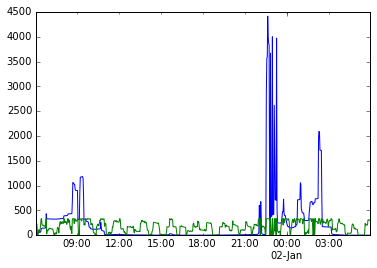

In [234]:
#m.plot()
results['inferred appliance energy']['dishwasher'].mul(10).plot()
results['inferred appliance energy']['fridgefreezer'].mul(10).plot()
#st['/370']['refrigerator1'].resample("2T").head(720).plot()
#results['inferred appliance energy']['washingmachine'].mul(10).plot()
#st['/370']['dishwasher1'].resample("2T").head(720).plot()

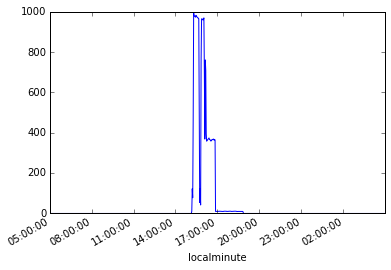

In [230]:
st['/370']['dishwasher1'].resample("2T").head(720).plot()

In [224]:
st['/370']['refrigerator1'].resample("2T").head(720)

localminute
2012-07-11 05:00:00-05:00      0.0
2012-07-11 05:02:00-05:00      0.0
2012-07-11 05:04:00-05:00      0.0
2012-07-11 05:06:00-05:00     47.0
2012-07-11 05:08:00-05:00    151.0
2012-07-11 05:10:00-05:00    220.0
2012-07-11 05:12:00-05:00    207.0
2012-07-11 05:14:00-05:00    205.5
2012-07-11 05:16:00-05:00    203.0
2012-07-11 05:18:00-05:00    200.0
2012-07-11 05:20:00-05:00    195.5
2012-07-11 05:22:00-05:00    144.0
2012-07-11 05:24:00-05:00     82.0
2012-07-11 05:26:00-05:00     61.5
2012-07-11 05:28:00-05:00      0.0
2012-07-11 05:30:00-05:00      0.0
2012-07-11 05:32:00-05:00      0.0
2012-07-11 05:34:00-05:00      0.0
2012-07-11 05:36:00-05:00      0.0
2012-07-11 05:38:00-05:00      0.0
2012-07-11 05:40:00-05:00      0.0
2012-07-11 05:42:00-05:00      0.0
2012-07-11 05:44:00-05:00      0.0
2012-07-11 05:46:00-05:00     75.0
2012-07-11 05:48:00-05:00     87.5
2012-07-11 05:50:00-05:00     86.5
2012-07-11 05:52:00-05:00     85.5
2012-07-11 05:54:00-05:00     85.0
2012-07-

In [233]:
results['inferred appliance energy']['dishwasher'].mul(10).index

DatetimeIndex(['2013-01-01 06:02:00', '2013-01-01 06:04:00',
               '2013-01-01 06:06:00', '2013-01-01 06:08:00',
               '2013-01-01 06:10:00', '2013-01-01 06:12:00',
               '2013-01-01 06:14:00', '2013-01-01 06:16:00',
               '2013-01-01 06:18:00', '2013-01-01 06:20:00', 
               ...
               '2013-01-02 05:40:00', '2013-01-02 05:42:00',
               '2013-01-02 05:44:00', '2013-01-02 05:46:00',
               '2013-01-02 05:48:00', '2013-01-02 05:50:00',
               '2013-01-02 05:52:00', '2013-01-02 05:54:00',
               '2013-01-02 05:56:00', '2013-01-02 05:58:00'],
              dtype='datetime64[ns]', length=719, freq=None, tz=None)